# Importing neccessary libraries

In [41]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

# Loading Datasets 

In [15]:
diabetes = pd.read_csv(r"C:\Users\nehaa\Downloads\diabetes dataset.csv")


C:\Users\nehaa\AppData\Local\Temp\ipykernel_19540\2585478022.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=diabetes, palette='Set1')


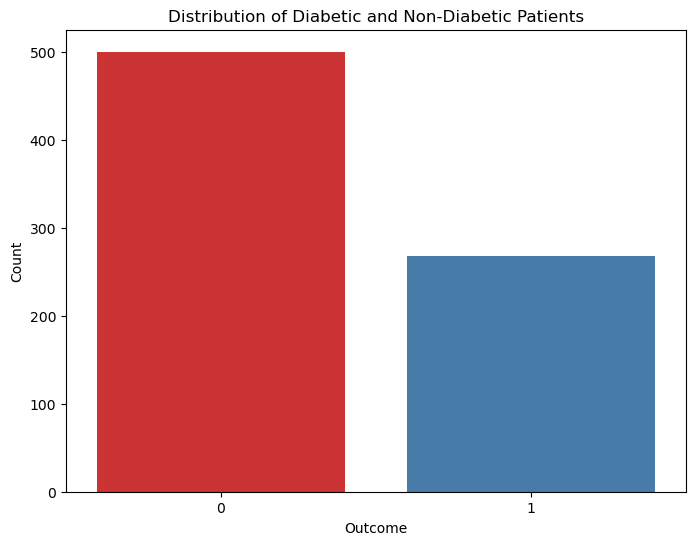

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(x='Outcome', data=diabetes, palette='Set1')
plt.title('Distribution of Diabetic and Non-Diabetic Patients')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

In [5]:

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetes.shape

(768, 9)

# Statistical Overview

In [9]:

diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Count of Diabetes Outcomes in the Dataset

In [11]:

diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# Count Plot 

C:\Users\nehaa\AppData\Local\Temp\ipykernel_19540\39022763.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=diabetes_dataset, x='Outcome', palette='viridis')  # Replace 'Outcome' with your target column name


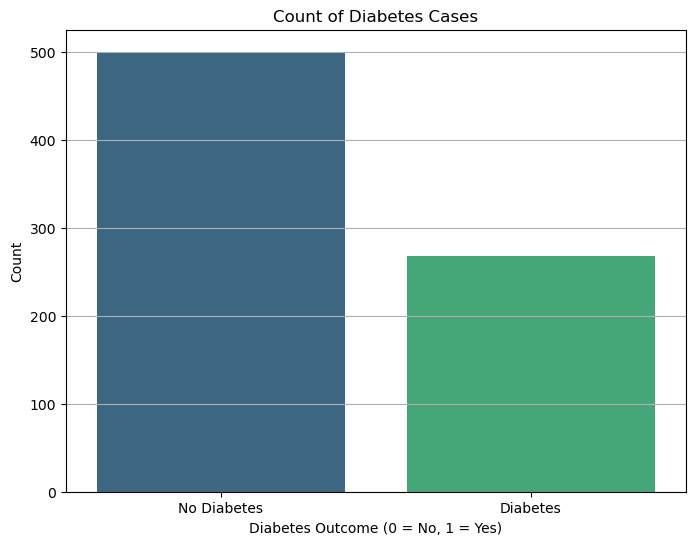

In [23]:
diabetes_dataset = pd.read_csv(r"C:\Users\nehaa\Downloads\diabetes dataset.csv")
plt.figure(figsize=(8, 6))
sns.countplot(data=diabetes_dataset, x='Outcome', palette='viridis')  # Replace 'Outcome' with your target column name
plt.title('Count of Diabetes Cases')
plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])  # Optional: Customize x-tick labels
plt.grid(axis='y')
plt.show()


# Feature Analysis by Outcome 

In [13]:
#0 means non-diabetic and 1 means diabetic patients
diabetes.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


# Preparing Data for Model Training

In [15]:
X = diabetes.drop(columns = 'Outcome', axis=1)
Y = diabetes['Outcome']


In [17]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [19]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Heatmap for Correlation Matrix 

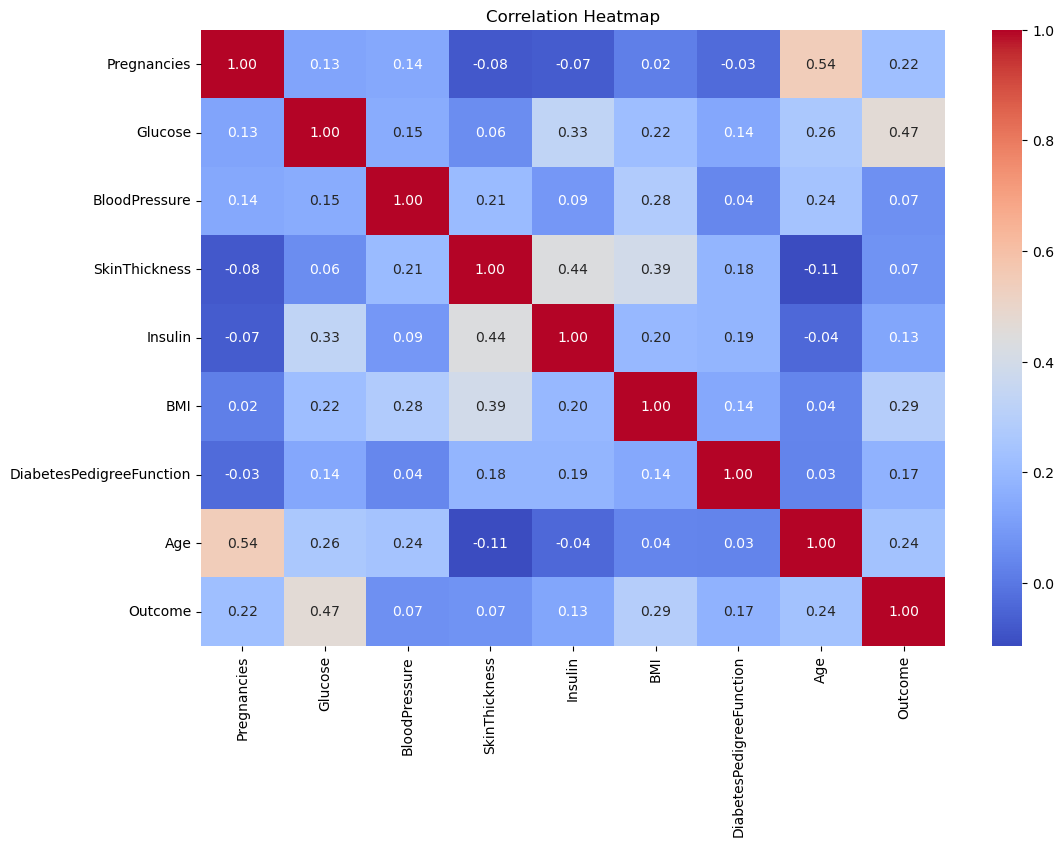

In [29]:
correlation_matrix = diabetes_dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Initializing StandardScaler

In [21]:
scaler = StandardScaler()

#  Fitting StandardScaler to the Feature Set

In [23]:
scaler.fit(X)

StandardScaler()

# Scaling Features for Improved Model Accuracy

In [25]:
standardized_data = scaler.transform(X)

In [27]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


# Preparing X with Standardized Data and Y with Outcomes

In [29]:
X = standardized_data
Y = diabetes['Outcome']

In [31]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


#  Training and Testing Sets for Model Evaluation"

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


# Configuring SVM with Linear Kernel for Prediction

In [35]:
classifier = svm.SVC(kernel='linear')

# Fitting the Support Vector Classifier to Training Data

In [37]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

# Predictions and Accuracy on Training Data

In [39]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)


# Evaluating Model Performance

In [41]:
print("Accuracy score of the training data is: ", training_data_accuracy)

Accuracy score of the training data is:  0.7866449511400652


# Predictions and Accuracy on Test Data


In [43]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

# Accuracy Score of the Test Dataset

In [45]:
print("Accuracy score of the test data is: ", test_data_accuracy)

Accuracy score of the test data is:  0.7727272727272727


# Determining Diabetes Status from User Data

In [47]:
input_data = (1,103,30,38,83,43.3,0.183,33)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
print(std_data)
prediction = classifier.predict(std_data)
print(prediction)
if (prediction[0] == 0):
    print("The Person is non-diabetic")
else:
    print("The person is diabetic")

[[-0.84488505 -0.56004775 -2.02166474  1.09545411  0.02778979  1.43512945
  -0.87244072 -0.0204964 ]]
[0]
The Person is non-diabetic


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


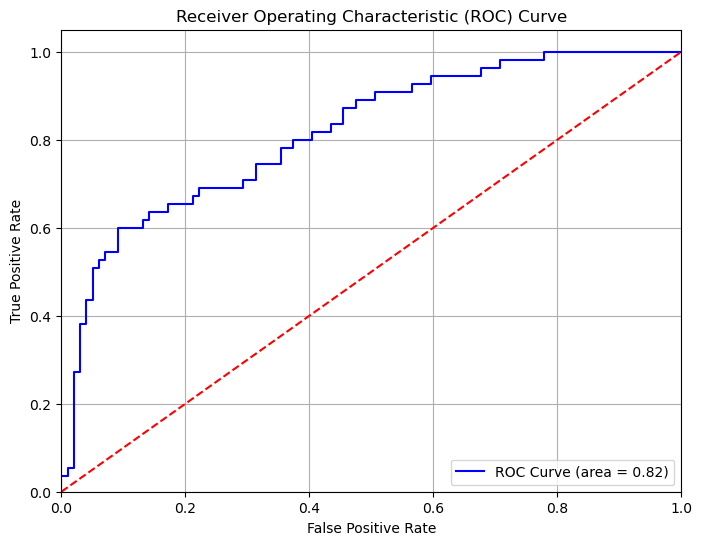

In [55]:


# Load the diabetes dataset
diabetes_dataset = pd.read_csv(r"C:\Users\nehaa\Downloads\diabetes dataset.csv")

# Define features (X) and target variable (y)
X = diabetes_dataset.drop('Outcome', axis=1)  
y = diabetes_dataset['Outcome']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train SVC with probability=True
model = SVC(probability=True, kernel='linear')  
model.fit(X_train, y_train)  

# Get predicted probabilities for the positive class
y_scores = model.predict_proba(X_test)[:, 1]  

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Saving the Trained Diabetes Classifier for Future Use

In [49]:

import pickle

In [51]:
filename = "diabetes_model.sav"
pickle.dump(classifier, open(filename, "wb"))

In [53]:

#loading the saved model

loaded_model = pickle.load(open("diabetes_model.sav", "rb"))

In [55]:
input_values = (5,166,72,19,175,25.8,0.587,51)

input_values_as_numpy_array = np.asarray(input_values)
input_values_reshaped = input_values_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_values_reshaped)
print(prediction)

if (prediction[0] == 0):
    print("The Person is non-diabetic")
else:
    print("The person is diabetic")

[1]
The person is diabetic


In [57]:
for column in diabetes:
    print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome
